<h1>Data Quality Assessment - KPMG</h1>

<h2>Necessary imports for data analysis</h2>

In [267]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import scipy.stats as ss

<h2>Data acquisition</h2>

In [268]:
dataset = pd.ExcelFile('KPMG_dataset.xlsx')
df1 = pd.read_excel(dataset,'Transactions',skiprows=1)
df2 = pd.read_excel(dataset,'CustomerDemographic',skiprows=1)
df3 = pd.read_excel(dataset,'CustomerAddress',skiprows=1)
df4 = pd.read_excel(dataset,'NewCustomerList',skiprows=1)

In [269]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(20000, 13)
(4000, 13)
(3999, 6)
(1000, 23)


<h2>Transaction Dataset - df1</h2>

Checking the first 5 records to see our data imported successfully

In [270]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


<b>Columns present in the dataset</b>

In [271]:
df1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

<b>Data types of each column</b>

In [272]:
df1.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

<h3>Missing values</h3>

In [273]:
df1.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

We see that the columns `order_status`, `product_line`, `brand`, `product_class`, `product_size`, `standard_cost`, `product_first_sold_date` have missing values present

<h3>Unique values</h3>

In [274]:
df1.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [275]:
df1['transaction_date'].sort_values()

516     2017-01-01
5876    2017-01-01
3459    2017-01-01
12484   2017-01-01
19130   2017-01-01
           ...    
605     2017-12-30
15269   2017-12-30
19906   2017-12-30
15756   2017-12-30
12003   2017-12-30
Name: transaction_date, Length: 20000, dtype: datetime64[ns]

<h3>Separating the date into day, month and year</h3>

In [276]:
df1['day'] = df1['transaction_date'].dt.day
df1['month'] = df1['transaction_date'].dt.month
df1['year'] = df1['transaction_date'].dt.year

In [277]:
df1_t = df1[['day','month','year']]

In [278]:
df1_t

,day,month,year
0,25,2,2017
1,21,5,2017
2,16,10,2017
3,31,8,2017
4,1,10,2017
...,...,...,...
19995,24,6,2017
19996,9,11,2017
19997,14,4,2017
19998,3,7,2017


In [279]:
df1_t[(df1_t['day']>31) | (df1_t['day']<1)]

,day,month,year


<h3>Plotting the day values to check for irregular vlaues</h3>

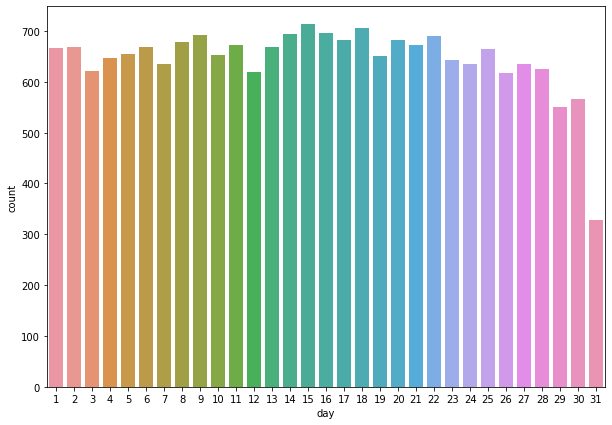

In [280]:
plt.figure(figsize=(10,7))
sns.countplot(df1_t['day'])
plt.show()

In [281]:
df1_t[(df1_t['month']>12) | (df1_t['month']<1)]

,day,month,year


<h3>Plotting the month values to check for anomalies</h3>

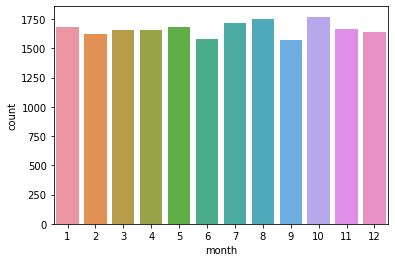

In [282]:
sns.countplot(df1_t['month'])
plt.show()

In [283]:
df1_t[(df1_t['year']>2020)]

,day,month,year


In [284]:
df1_t['year'].sort_values()

0        2017
13336    2017
13335    2017
13334    2017
13333    2017
         ... 
6664     2017
6663     2017
6662     2017
6669     2017
19999    2017
Name: year, Length: 20000, dtype: int64

<h3>Plotting the year</h3>

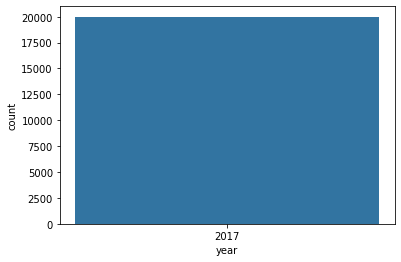

In [285]:
sns.countplot(df1_t['year']) 
plt.show()

<h3>Converting the product_first_sold_date to datetime format</h3>

In [341]:
df1['product_first_sold_date'] = pd.to_datetime(df1['product_first_sold_date'], unit='s')

In [342]:
df1['product_first_sold_date']

0       1970-01-01 11:27:25
1       1970-01-01 11:35:01
2       1970-01-01 10:06:01
3       1970-01-01 10:02:25
4       1970-01-01 11:43:46
                ...        
19995   1970-01-01 10:30:23
19996   1970-01-01 09:52:40
19997   1970-01-01 11:13:30
19998   1970-01-01 10:36:56
19999   1970-01-01 10:05:34
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns]

In [287]:
df1_g = pd.DataFrame()
df1_g['day'] = df1['product_first_sold_date'].dt.day
df1_g['month'] = df1['product_first_sold_date'].dt.month
df1_g['year'] = df1['product_first_sold_date'].dt.year

In [288]:
df1_g.isnull().sum()

day      197
month    197
year     197
dtype: int64

In [289]:
df1_g.nunique()

day      1
month    1
year     1
dtype: int64

All the rows in the dataset have either <b>NULL values or a singular date value</b>. It seems that the records of all the products have been made at the same date and different times. This requires further analysis.

In [290]:
df1[df1['list_price']<df1['standard_cost']]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,day,month,year


<h3>Checking for price outliers</h3>

In [291]:
df1[(np.abs(df1.list_price-df1.list_price.mean()) <= (3*df1.list_price.std()))]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,day,month,year
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,25,2,2017
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,21,5,2017
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,16,10,2017
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,31,8,2017
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,24,6,2017
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,9,11,2017
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,14,4,2017
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,3,7,2017


No such outliers found for the `list_price` column

<h3>Checking for duplicate records</h3>

In [292]:
df1[df1.duplicated()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,day,month,year


No duplicate values found

<h3>Summary statistics of the dataset</h3>

In [293]:
df1.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,day,month,year
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,20000.000000,20000.000000,20000.0
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,15.579050,6.516950,2017.0
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,8.674486,3.448914,0.0
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,1.000000,1.000000,2017.0
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,8.000000,4.000000,2017.0
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,16.000000,7.000000,2017.0
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,23.000000,10.000000,2017.0
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,31.000000,12.000000,2017.0


<h3>Correlation heatmap of numerical values</h3>

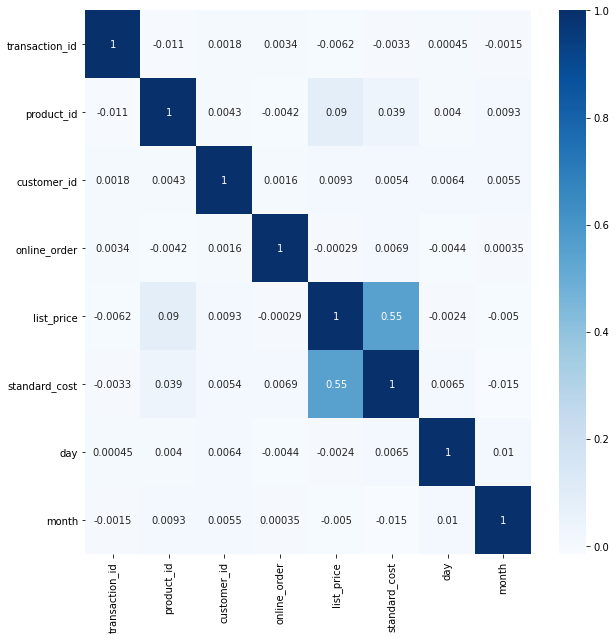

In [294]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.drop('year',axis=1).corr(),annot=True,cmap='Blues')
plt.show()

<h3>Processing data to check for discrepancies</h3>

In [295]:
print(df1['order_status'].value_counts())

Approved     19821
Cancelled      179
Name: order_status, dtype: int64


In [296]:
print(df1['brand'].value_counts())

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64


In [297]:
print(df1['product_size'].value_counts())

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64


In [298]:
print(df1['product_class'].value_counts())

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64


In [299]:
print(df1['product_line'].value_counts())

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64


In [300]:
print(df1['online_order'].value_counts())

1.0    9829
0.0    9811
Name: online_order, dtype: int64


In [301]:
print(df1['order_status'].value_counts())

Approved     19821
Cancelled      179
Name: order_status, dtype: int64


In [302]:
print(df1['brand'].value_counts())

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64


In [303]:
print(df1['product_size'].value_counts())

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64


In [304]:
print(df1['product_class'].value_counts())

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64


In [305]:
print(df1['product_line'].value_counts())

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64


In [306]:
print(df1['online_order'].value_counts())

1.0    9829
0.0    9811
Name: online_order, dtype: int64


All the data seeems to be in order, we can now proceed to the next dataset, The customer demographic dataset

<h2>Customer Demographic Dataset - df2</h2>

Printing the shape as well as the first 5 rows to check the imports were correct.

In [307]:
print(df2.shape)
df2.head()

(4000, 13)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


We can instantly see that the `default` column has values which are not of the same encoding scheme as the rest of the dataset, we analyze this further.

In [308]:
df2['default'].unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0),
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       'NIL', 'ðµ ð ð ð', 'â°â´âµâââ', '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)', '0/0',
       'ð©ð½', 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ', 'nil', -100, 'â°â´âµ', 'ð',
       1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416,
       'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·',
       'ÅâÂ´â°ËÃÂ¨ËÃâââ', 'ï¼ï¼ï¼',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;',
       'ì¬íê³¼íì ì´íì°êµ¬ì', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       nan, '!@#$%^&*()', "'",
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«Í

The dataset has values that are not of the same encoding scheme, the column does not help us in our analysis. It should be dropped.

<h3>Summary Statistics</h3>

In [309]:
df2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


<h3>Checking missing values</h3>

In [310]:
df2.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

<h3>Data types of each column</h3>

In [311]:
df2.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

<h3>Unique values in each column</h3>

In [312]:
df2.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

We notice that the gender column has 6 distinct values, this seems like an anomaly, we examine it further.

In [313]:
df2.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

We can see that Female, Femal and F are the same group but labelled differently. The same is observed for M and Male. We should group them up together to prevent any further issues.

<h3>Converting Date of Birth to Day, month and year</h3>

In [314]:
df2_dob = pd.DataFrame()
df2_dob['day'] = df2['DOB'].dt.day
df2_dob['month'] = df2['DOB'].dt.month
df2_dob['year'] = df2['DOB'].dt.year

In [315]:
df2_dob

,day,month,year
0,12.0,10.0,1953.0
1,16.0,12.0,1980.0
2,20.0,1.0,1954.0
3,3.0,10.0,1961.0
4,13.0,5.0,1977.0
...,...,...,...
3995,9.0,8.0,1975.0
3996,13.0,7.0,2001.0
3997,NaN,NaN,NaN
3998,24.0,10.0,1973.0


<h3>Plotting day values</h3>

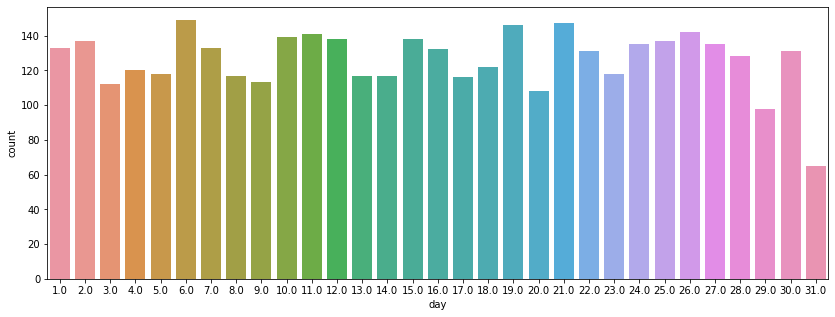

In [316]:
plt.figure(figsize=(14,5))
sns.countplot(df2_dob['day'])
plt.show()

<h3>Plotting Month values</h3>

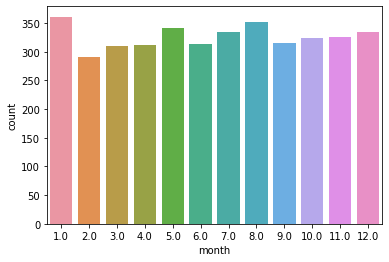

In [317]:
sns.countplot(df2_dob['month'])
plt.show()

<h3>Finding Outliers in the date of birth</h3>

In [318]:
df2_dob[~(np.abs(df2_dob.year-df2_dob.year.mean()) <= (3*df2_dob.year.std()))]

,day,month,year
33,21.0,12.0,1843.0
143,NaN,NaN,NaN
167,NaN,NaN,NaN
266,NaN,NaN,NaN
289,NaN,NaN,NaN
...,...,...,...
3778,NaN,NaN,NaN
3882,NaN,NaN,NaN
3930,NaN,NaN,NaN
3934,NaN,NaN,NaN


We see that there is a column with the year as 1843, this is an outlier and the value is incorrect as it would refer to a person above the age of 110, this shouldn't be the case. The record should be removed or cross-referenced.

In [319]:
df2_dob.year.sort_values()

33      1843.0
719     1931.0
1091    1935.0
3409    1940.0
2412    1943.0
         ...  
3778       NaN
3882       NaN
3930       NaN
3934       NaN
3997       NaN
Name: year, Length: 4000, dtype: float64

<h3>Checking columns</h3>

In [320]:
df2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

<h3>Basic data analysis</h3>

In [321]:
df2.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [322]:
df2.deceased_indicator.value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [323]:
df2[df2.deceased_indicator=='Y']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,-0.5,Yes,6.0
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,ÌÌºÍÌ¹Ì¯ÍTÌ±Ì¤ÍÌ¥ÍÍhÍÌ²eÍÍÌ¼ÌÌÌ¼Ì£Í ÍÌÌ±Ì ÍÍÍN...,Yes,9.0


In [324]:
df2.job_industry_category.value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [325]:
df2.job_title.value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Computer Systems Analyst III             4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [326]:
df2.job_title.unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', nan, 'Senior Editor', 'Media Manager I',
       'Business Systems Development Analyst', 'Senior Quality Engineer',
       'Nuclear Power Engineer', 'Developer I', 'Account Executive',
       'Junior Executive', 'Media Manager IV', 'Sales Associate',
       'Professor', 'Geological Engineer', 'Project Manager',
       'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Product Engineer', 'Information Systems Manager',
       'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
       'Assistant Media Planner', 'Payment Adjustment Coordinator',
       'Food Chemist', 'Accountant III', 'Director of Sales',
       'Senior Financial Analyst', 'Registered Nurse',
       'Biostatistician II', 'Computer Systems Analyst II',
       'Software Test Engineer II', 

We see that the records have a numbering beside the role for eg - `Biostatistician I` `Biostatistician II` `Biostatistician III` `Biostatistician IV` are different roles. These should either be combined or some other detailed scheme should be used to prevent any form of errors while analyzing. 

In [327]:
df2.wealth_segment.value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [328]:
df2.past_3_years_bike_related_purchases.value_counts()

16    56
19    56
20    54
67    54
2     50
      ..
8     28
86    27
95    27
85    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [329]:
df2.tenure.value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

<h3>Correlation heatmap among numerical columns</h3>

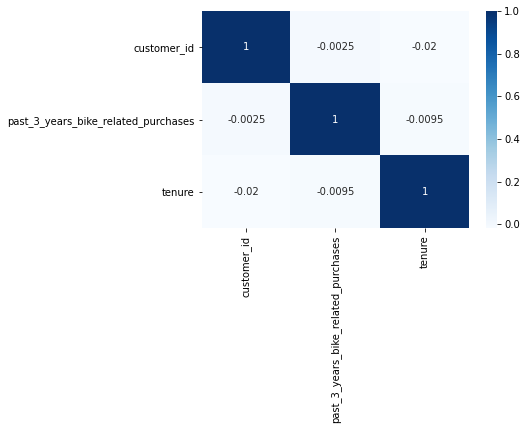

In [330]:
sns.heatmap(df2.corr(),annot=True,cmap='Blues')
plt.show()

<h3>Checking for duplicate values</h3>

In [331]:
df2[df2.duplicated()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


We see that there are no duplicate values present in the dataset.

<h2>Customer Address - df3</h2>

Printing the shape of the dataset and the top 5 rows to cross-verify our data import

In [332]:
print(df3.shape)
df3.head()

(3999, 6)


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [333]:
df3.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [334]:
df3.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

<h3>Checking NULL values</h3>

In [335]:
df3.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

<h3>Unique values in each column</h3>

In [336]:
df3.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [337]:
df3.property_valuation.value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64


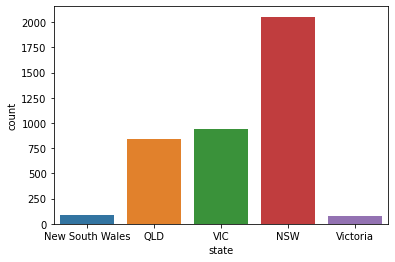

In [338]:
print(df3.state.value_counts())
sns.countplot(df3.state)
plt.show()

We see that <b>Victoria</b> and <b>VIC</b> are the same but labelled differently. This is the same for <b>New South Wales</b> and <b>NSW</b>. These errors should be fixed.

In [339]:
df3.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

<h3>Checking duplicate values</h3>

In [340]:
df3[df3.duplicated()]

,customer_id,address,postcode,state,country,property_valuation


We see that there are no duplicate values present.